## Bluesky RunEngine setup

In [5]:


# Import bluesky and ophyd
import matplotlib.pyplot as plt
from bluesky import RunEngine
from bluesky.run_engine import get_bluesky_event_loop
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plan_stubs import *
from bluesky.plans import *

import asyncio


from bluesky.utils import ProgressBarManager
from bssecop.SECoPDevices import SECoP_Node_Device



 

# Create a run engine, with plotting, progressbar and transform
RE = RunEngine({}, call_returns_result=True)
bec = BestEffortCallback()
RE.subscribe(bec)
RE.waiting_hook = ProgressBarManager()
RE.ignore_callback_exceptions = False
plt.ion()


### ophyd-SECoP Device generation

In [6]:
cryoNode = SECoP_Node_Device.create_external_loop(host='localhost',port ='10769',loop= RE.loop)

cryo_7.frappy.demo ready


### Count Plan



Transient Scan ID: 1     Time: 2023-06-13 10:50:04
Persistent Unique Scan ID: '5754e4f4-e4c8-4d82-969e-c419627804f1'
New stream: 'primary'
+-----------+------------+-------------------------------+
|   seq_num |       time | cryo_7-frappy-demo-cryo-value |
+-----------+------------+-------------------------------+
|         1 | 10:50:04.8 |                         9.999 |
|         2 | 10:50:05.3 |                        10.028 |
|         3 | 10:50:05.8 |                        10.028 |
|         4 | 10:50:06.3 |                        10.032 |
|         5 | 10:50:06.8 |                        10.032 |
|         6 | 10:50:07.3 |                        10.002 |
|         7 | 10:50:07.8 |                        10.002 |
|         8 | 10:50:08.3 |                         9.968 |
|         9 | 10:50:08.8 |                         9.968 |
|        10 | 10:50:09.3 |                        10.034 |
|        11 | 10:50:09.8 |                        10.034 |
|        12 | 10:50:10.3 |       

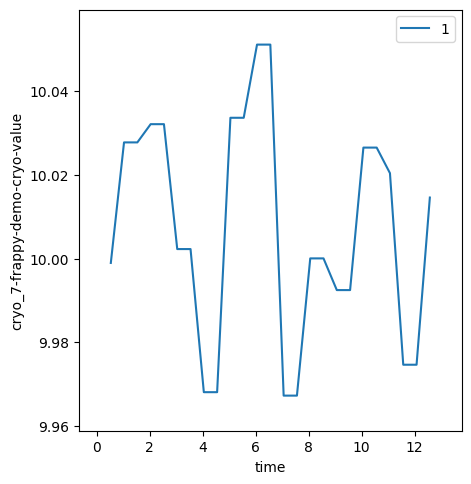

In [7]:
# get readings of cryo.value (0.5/s)
p = RE(count([cryoNode.cryo],num=25,delay=0.5))

### Scan Plan



Transient Scan ID: 2     Time: 2023-06-13 10:50:24
Persistent Unique Scan ID: '51f1b0f5-ceea-4f25-b5fe-cb80d7539df7'
New stream: 'primary'
+-----------+------------+-------------------------------+
|   seq_num |       time | cryo_7-frappy-demo-cryo-value |
+-----------+------------+-------------------------------+
|         1 | 10:50:24.8 |                         9.979 |

                                                                               
|         2 | 10:50:55.1 |                        10.255 |

                                                                               
|         3 | 10:51:28.8 |                        10.530 |

                                                                               
|         4 | 10:51:58.2 |                        10.702 |

                                                                               
|         5 | 10:52:29.2 |                        11.003 |
+-----------+------------+-------------------------------+
gene

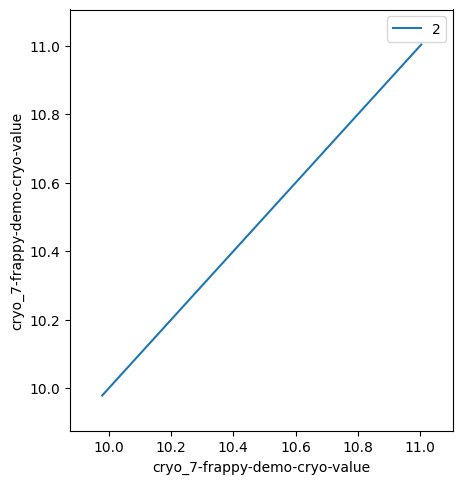

disconnectiong
disconnected
1
disconnectiong
disconnected
1
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
reconn failed
re

In [8]:
# drive from 10K to 11K in five steps 
p = RE(scan([cryoNode.cryo],cryoNode.cryo,10,11,5))

In [ ]:
cryoNode